## Spark Foundation Task 1

### Prediction using supervised learning

### To predict the number of marks student score on study of 9.25 hours/day

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


##### Importing the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

### Basic explanatory data Analysis

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.isnull().sum()  ## No null Values

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


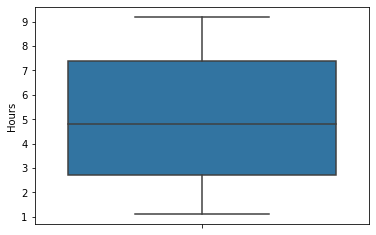

In [8]:
sns.boxplot(y =df['Hours'] , data = df)  ## No outliers present
plt.show()

### No missing value and outliers , so no need to deal with the missing value treatment and outlier treatment

C:\Users\Lakshay Tyagi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

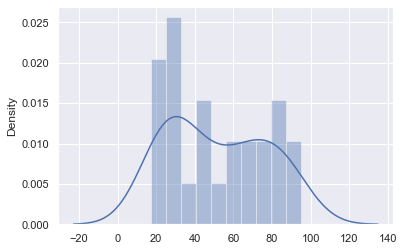

In [10]:
sns.set()
sns.distplot(x = df['Scores'], bins = 10) ## Log transformation and target variable give same plot so, considering this one.

In [11]:
print("skewness : ", df['Scores'].skew())
print("Kurtosis : ", df['Scores'].kurtosis())

skewness :  0.2339646665397317
Kurtosis :  -1.4438326250947935


In [12]:
features = df['Hours']

In [13]:
Target = df['Scores']

In [16]:
features.corr(Target) ## X variable is high correlated with Y variable

0.9761906560220887

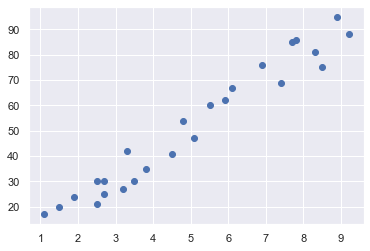

In [17]:
plt.scatter(x =features, y =Target)

In [18]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Splitting the Data into test and train

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train , test = train_test_split(df, test_size =  0.3, random_state = 123)

In [21]:
len(train)

17

In [22]:
len(test)

8

## Creating the model

In [23]:
import statsmodels.formula.api as smf

In [24]:
eq = 'Scores~Hours'

In [25]:
model = smf.ols(eq,data = train).fit()

In [26]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.943   
Dependent Variable: Scores           AIC:                112.0607
Date:               2021-02-17 08:00 BIC:                113.7271
No. Observations:   17               Log-Likelihood:     -54.030 
Df Model:           1                F-statistic:        263.8   
Df Residuals:       15               Prob (F-statistic): 6.28e-11
R-squared:          0.946            Scale:              38.237  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.4245    3.1721   0.7643  0.4565  -4.3366   9.1857
Hours          9.5874    0.5903  16.2420  0.0000   8.3292  10.8455
-----------------------------------------------------------------
Omnibus:              5.055        Durbin-Watson:           2.870
Prob(Omnibus):        

C:\Users\Lakshay Tyagi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Predictions

In [27]:
train['Pred'] = model.predict(train)

<ipython-input-27-502c2ece60b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Pred'] = model.predict(train)


In [28]:
train.head(5)

,Hours,Scores,Pred
4,3.5,30,35.980317
3,8.5,75,83.917129
24,7.8,86,77.205976
12,4.5,41,45.567679
16,2.5,30,26.392954


In [29]:
test['Pred'] = model.predict(test)

<ipython-input-29-95fdc37ca25e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = model.predict(test)


In [30]:
test.head()

,Hours,Scores,Pred
5,1.5,20,16.805592
21,4.8,54,48.443888
22,3.8,35,38.856526
18,6.1,67,60.907459
15,8.9,95,87.752074


In [31]:
from sklearn import metrics

In [32]:
import scipy.stats as stats

In [33]:
MAPE_train = round(np.mean(np.abs((train.Scores-train.Pred)/train.Scores))*100,2)
print('MAPE_train', MAPE_train)

MSE_train = metrics.mean_absolute_error(train.Scores, train.Pred)
print('MSE_train : ' , MSE_train)



MAPE_train 13.39
MSE_train :  5.363767763157061


In [34]:
MAPE_test = round(np.mean(np.abs((test.Scores-test.Pred)/test.Scores))*100,2)
print('MAPE_test', MAPE_test)

MSE_test = metrics.mean_absolute_error(test.Scores, test.Pred)
print('MSE_test : ' , MSE_test)



MAPE_test 8.52
MSE_test :  4.350267480006008


In [35]:
### As the linear equation of regression is y = mx+c


In [36]:
y = (9.25*9.58) +2.42

In [37]:
y


91.035

#### As per the prediction, on the basis of 9.25 hours study , student will score 91 Marks